In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xarray as xr
import torch
from torch.utils.data import Dataset
import os
import pandas as pd
from typing import List
import numpy as np
import cmocean

import DeepFate

from DeepFate import config
from DeepFate.datasets.MCSPrecomputedDataset import MCSPrecomputedDataset

import torch
from torch.utils.data import DataLoader

from tqdm import tqdm

from DeepFate.datasets.utils import get_list_valid_mcs
from DeepFate.datasets.load_toocan_dyamond import load_TOOCAN_DYAMOND

from DeepFate.datasets.utils import get_validity_lifecycles_start_end
from DeepFate.datasets.generate_precomputed_datasets import get_specs_mcs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'DeepFate.datasets.MCSPrecomputedDataset'

In [ ]:
from DeepFate.datasets.main_fusion import combine_h5_datasets
pathfolder = '/work/bb1153/b381993/data/3_FINAL_MINI_TEST'
input_folder = pathfolder
output_file = os.path.join(pathfolder, 'DEEPFATE_DATASET_2.h5')
combine_h5_datasets(input_folder, output_file)

hdf5_files ['DEEPFATE_22-05-2024-0114_index_from_11001_to_22405.h5', 'DEEPFATE_22-05-2024-0114_index_from_0_to_11000.h5']
kllkklkl /work/bb1153/b381993/data/3_FINAL_MINI_TEST/DEEPFATE_22-05-2024-0114_index_from_11001_to_22405.h5


100%|██████████| 89/89 [02:28<00:00,  1.67s/it]


kllkklkl /work/bb1153/b381993/data/3_FINAL_MINI_TEST/DEEPFATE_22-05-2024-0114_index_from_0_to_11000.h5


 74%|███████▍  | 63/85 [01:51<00:36,  1.67s/it]

In [9]:
! ls -l '/work/bb1153/b381993/data/3_FINAL_MINI_TEST'

total 372808136
-rw-r--r-- 1 b381993 bb1153  93717792792 May 22 01:49 DEEPFATE_22-05-2024-0114_index_from_0_to_11000.h5
-rw-r--r-- 1 b381993 bb1153  97159790520 May 22 01:54 DEEPFATE_22-05-2024-0114_index_from_11001_to_22405.h5
-rw-r--r-- 1 b381993 bb1153 190877573060 May 22 17:25 DEEPFATE_DATASET_2.h5
drwxr-sr-x 2 b381993 bb1153         4096 May 22 01:55 saved_models
drwxr-sr-x 2 b381993 bb1153         4096 May 22 01:55 saved_preds
drwxr-sr-x 2 b381993 bb1153         4096 May 22 01:55 saved_stats
drwxr-sr-x 2 b381993 bb1153         4096 May 22 01:55 saved_stats_figures


In [43]:
import h5py
filename = '/work/bb1153/b381993/data/FINAL_VERSION_SEPTEMBER_new/DEEPFATE_DATASET.h5'
index=1000
with h5py.File(filename, 'r') as f:
    images_i = f['X'][index]
    specs_i = f['z'][index]
        

In [44]:
import sys
module_dir = '/home/b/b381993'
sys.path.append(module_dir)
import argparse
import h5py
import numpy as np
from tqdm import tqdm
import pandas as pd
import multiprocessing
import os


from DeepFate.datasets.generate_precomputed_datasets import get_specs_mcs, get_z_data
from DeepFate.datasets.utils import get_list_valid_mcs, get_validity_lifecycles_start_end
from DeepFate.datasets.load_toocan_dyamond import load_TOOCAN_DYAMOND
import DeepFate

PATH_TOOCAN_GLOBAL_FILE ='/work/bb1153/b381993/data3/data/new_TOOCAN-GLOBAL-20160801-20160831.dat.gz'
#from DeepFate.config import PATH_TOOCAN_GLOBAL_FILE

path = PATH_TOOCAN_GLOBAL_FILE ###path change with new file
list_object_mcs = load_TOOCAN_DYAMOND(path) ##change load_tooca

list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_object_mcs,
                   max_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][1],
                    min_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][1], #now in hours
                    duration_min = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][0],
                    lat_max=DeepFate.config.MAX_LAT_TROPICS)

validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]

label_all = np.array([list_valid_mcs_2[i].DCS_number for i in range(len(list_valid_mcs_2))])

100%|██████████| 72965/72965 [00:04<00:00, 17651.22it/s]


In [45]:
len(list_valid_mcs_2)

46508

In [3]:
from DeepFate.interpretable_features.features import get_all_features_single_mcs
df = get_all_features_single_mcs(X_images=images_i, 
                                 specs=specs_i, 
                                 list_valid_mcs_2=list_valid_mcs_2, 
                                 label_all=label_all, 
                                 list_start_times=list_start_times)

label_all 22405
267097.0 [12000] [215808 215809 215810 215811 215812 215814 215815 215816 216189 216191]


In [4]:
a = np.array([2.000, 3.000])

In [5]:
np.where(a==2)

(array([0]),)

In [4]:
2.000==2

True

In [40]:
df = pd.read_csv('/work/bb1153/b381993/data/FINAL_VERSION_SEPTEMBER_new/test_dataset.csv')
colsA = set(df.columns)

In [41]:
df

Unnamed: 0  nb_neighbours_time_0  nb_neighbours_time_1  \
0              0                    15                    14   
1              1                    15                    14   
2              2                    18                    18   
3              3                     6                     6   
4              4                    17                    16   
...          ...                   ...                   ...   
5597        5597                    14                    16   
5598        5598                    22                    23   
5599        5599                    12                    12   
5600        5600                    21                    21   
5601        5601                    13                    16   

      nb_neighbours_time_2  nb_neighbours_time_3  nb_neighbours_time_4  \
0                       12                    12                    11   
1                       17                    17                    20   
2                       19                    20                    20   
3                        6                     6                     7   
4                       15                    16                    16   
...                    ...                   ...                   ...   
5597                    16                    16                    14   
5598                    25                    24                    24   
5599                    12                    13                    13   
5600                    20                    21                    19   
5601                    18                    19                    19   

      nb_neighbours_time_5  nb_neighbours_time_6  nb_neighbours_time_7  \
0                        8                     8                    11   
1                       20                    20                    20   
2                       17                    15                    17   
3                        7                     6                     5   
4                       18                    18                    19   
...                    ...                   ...                   ...   
5597                    15                    15                    15   
5598                    26                    26                    25   
5599                    13                    15                    17   
5600                    20                    19                    20   
5601                    17                    17                    18   

      nb_neighbours_time_8  ...  std_under_cloud_var_6_time_9  \
0                       11  ...                      0.112774   
1                       18  ...                      0.018352   
2                       13  ...                      0.041261   
3                        5  ...                      0.003685   
4                       20  ...                      0.004088   
...                    ...  ...                           ...   
5597                    15  ...                      0.048794   
5598                    26  ...                      0.048030   
5599                    18  ...                      0.031651   
5600                    22  ...                      0.110020   
5601                    19  ...                      0.036033   

      std_under_cloud_var_7_time_9  std_under_cloud_var_8_time_9  \
0                         0.867613                      0.532247   
1                         0.057587                      0.068188   
2                         0.190186                      0.208862   
3                         0.139952                      0.131618   
4                         0.136742                      0.074199   
...                            ...                           ...   
5597                      0.562053                      0.475630   
5598                      0.263329                      0.415273   
5599                      0.344628                      0.556887  

In [36]:
df = df.dropna(axis=1, how='any')
colsB = set(df.columns)

In [37]:
df = df.dropna(axis=0, how='any')
df

nb_neighbours_time_0  nb_neighbours_time_1  nb_neighbours_time_2  \
0                         5                     4                     4   
1                        24                    23                    22   
2                         9                     9                     7   
3                        30                    34                    34   
4                        11                    12                    13   
...                     ...                   ...                   ...   
22400                    19                    20                    22   
22401                    13                    14                    13   
22402                    10                    10                    11   
22403                    19                    17                    17   
22404                    18                    17                    17   

       nb_neighbours_time_3  nb_neighbours_time_4  nb_neighbours_time_5  \
0                         4                     4                     4   
1                        23                    25                    24   
2                         7                     7                     6   
3                        34                    34                    33   
4                        13                    11                    11   
...                     ...                   ...                   ...   
22400                    23                    24                    25   
22401                    12                    12                    12   
22402                    11                    13                    14   
22403                    18                    20                    20   
22404                    14                    15                    15   

       nb_neighbours_time_6  nb_neighbours_time_7  nb_neighbours_time_8  \
0                         5                     4                     4   
1                        23                    26                    26   
2                         9                     9                     8   
3                        33                    31                    31   
4                        11                    10                    12   
...                     ...                   ...                   ...   
22400                    26                    24                    26   
22401                    12                    12                    12   
22402                    15                    16                    14   
22403                    18                    20                    22   
22404                    16                    18                    19   

       nb_neighbours_time_9  ...  std_under_cloud_var_6_time_9  \
0                         4  ...                      0.074062   
1                        24  ...                      0.005210   
2                         6  ...                      0.000462   
3                        33  ...                      0.280537   
4                        11  ...                      0.002175   
...                     ...  ...                           ...   
22400                    25  ...                      0.064433   
22401                    11  ...                      0.184966   
22402                    16  ...                      0.262850   
22403                    21  ...                      0.015194   
22404                    18  ...                      0.005049   

       std_under_cloud_var_7_time_9  std_under_cloud_var_8_time_9  \
0                          0.248199                      0.384795   
1                          0.548341                      0.188631   
2                          0.200768                      0.094886   
3                          0.852494                      0.842565   
4                          0.168938                      0.227336   
...                             ...                           ...   
22400                      0

In [33]:
df[['circularity_time_0',
 'circularity_time_1',
 'circularity_time_2',
 'circularity_time_6',
 'circularity_time_7',
 'circularity_time_8',
 'circularity_time_9']]

circularity_time_0  circularity_time_1  circularity_time_2  \
0                0.938114            0.921146            0.861117   
1                3.141593            0.784581            0.769685   
2                     NaN            0.661388            0.822353   
3                     NaN            0.251327            0.229838   
4                0.598399            0.636173            0.926443   
...                   ...                 ...                 ...   
22400            0.457672            0.513446            0.294154   
22401                 NaN                 NaN            1.795196   
22402                 NaN            0.785398            1.046575   
22403                 NaN                 NaN            0.954573   
22404            4.188790            0.853913            1.012650   

       circularity_time_6  circularity_time_7  circularity_time_8  \
0                0.970720            0.775702            0.408831   
1                0.633540            0.336176            0.140174   
2                0.653817            0.659629            0.128601   
3                0.468670            0.608391            0.513943   
4                0.558916            0.625864            0.439823   
...                   ...                 ...                 ...   
22400            0.384546            0.505068            0.532701   
22401            0.243985            0.229613            0.234096   
22402            0.694394            0.658204            0.680395   
22403            0.617459            0.700831            0.349345   
22404            0.628194            0.516352            0.306175   

       circularity_time_9  
0                0.277260  
1                0.546364  
2               12.566371  
3                0.552094  
4                0.310050  
...                   ...  
22400            0.577811  
22401            0.305564  
22402            0.597856  
22403            0.089602  
22404            0.465421  

[22405 rows x 7 columns]

In [23]:
df = df.dropna(axis=1, how='all')
len(df)

22405

In [17]:
df = df.dropna(axis=0)
len(df)

6314

In [13]:
len(df)

22405

In [12]:
nan_mask = df.isna()
df[nan_mask]

nb_neighbours_time_0  nb_neighbours_time_1  nb_neighbours_time_2  \
0                       NaN                   NaN                   NaN   
1                       NaN                   NaN                   NaN   
2                       NaN                   NaN                   NaN   
3                       NaN                   NaN                   NaN   
4                       NaN                   NaN                   NaN   
...                     ...                   ...                   ...   
22400                   NaN                   NaN                   NaN   
22401                   NaN                   NaN                   NaN   
22402                   NaN                   NaN                   NaN   
22403                   NaN                   NaN                   NaN   
22404                   NaN                   NaN                   NaN   

       nb_neighbours_time_3  nb_neighbours_time_4  nb_neighbours_time_5  \
0                       NaN                   NaN                   NaN   
1                       NaN                   NaN                   NaN   
2                       NaN                   NaN                   NaN   
3                       NaN                   NaN                   NaN   
4                       NaN                   NaN                   NaN   
...                     ...                   ...                   ...   
22400                   NaN                   NaN                   NaN   
22401                   NaN                   NaN                   NaN   
22402                   NaN                   NaN                   NaN   
22403                   NaN                   NaN                   NaN   
22404                   NaN                   NaN                   NaN   

       nb_neighbours_time_6  nb_neighbours_time_7  nb_neighbours_time_8  \
0                       NaN                   NaN                   NaN   
1                       NaN                   NaN                   NaN   
2                       NaN                   NaN                   NaN   
3                       NaN                   NaN                   NaN   
4                       NaN                   NaN                   NaN   
...                     ...                   ...                   ...   
22400                   NaN                   NaN                   NaN   
22401                   NaN                   NaN                   NaN   
22402                   NaN                   NaN                   NaN   
22403                   NaN                   NaN                   NaN   
22404                   NaN                   NaN                   NaN   

       nb_neighbours_time_9  ...  std_under_cloud_var_6_time_9  \
0                       NaN  ...                           NaN   
1                       NaN  ...                           NaN   
2                       NaN  ...                           NaN   
3                       NaN  ...                           NaN   
4                       NaN  ...                           NaN   
...                     ...  ...                           ...   
22400                   NaN  ...                           NaN   
22401                   NaN  ...                           NaN   
22402                   NaN  ...                           NaN   
22403                   NaN  ...                           NaN   
22404                   NaN  ...                           NaN   

       std_under_cloud_var_7_time_9  std_under_cloud_var_8_time_9  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
22400                       

In [5]:
import matplotlib.pyplot as plt

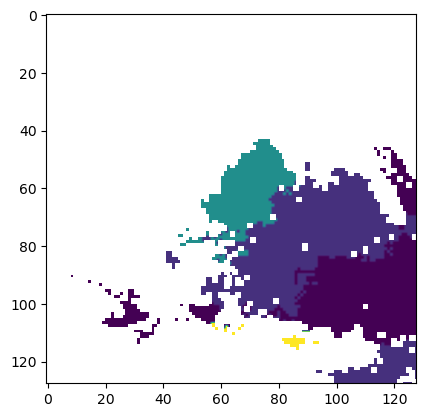

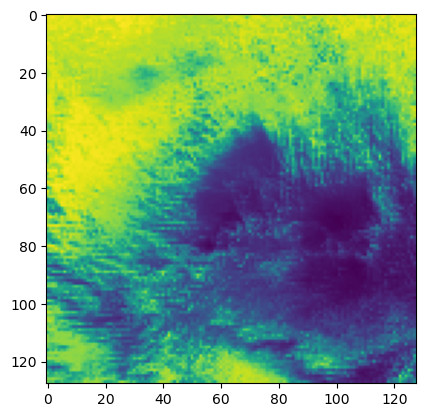

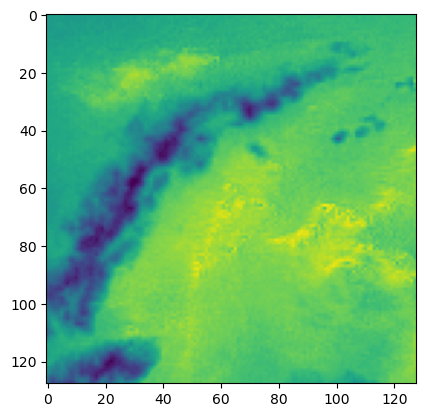

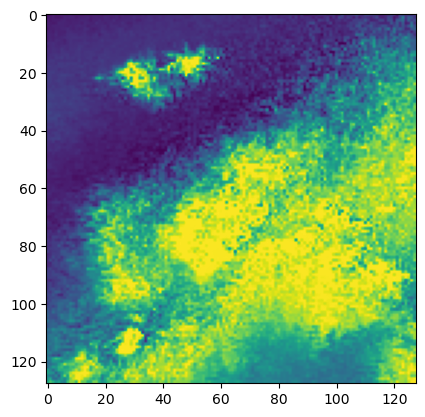

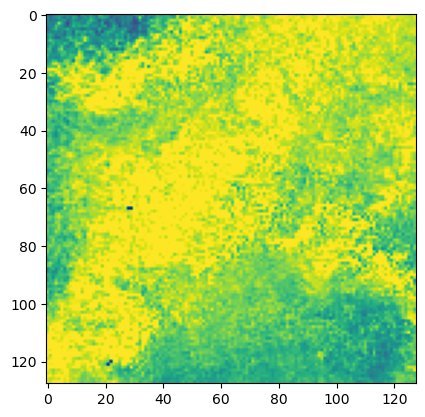

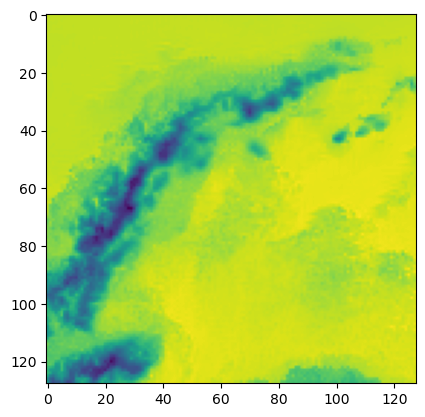

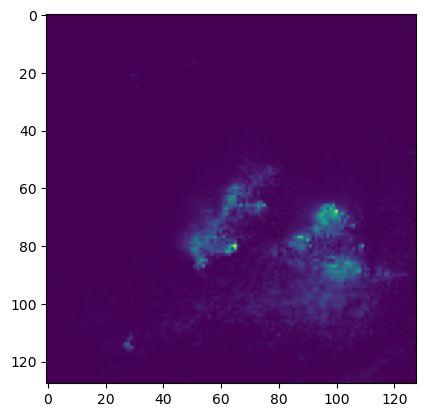

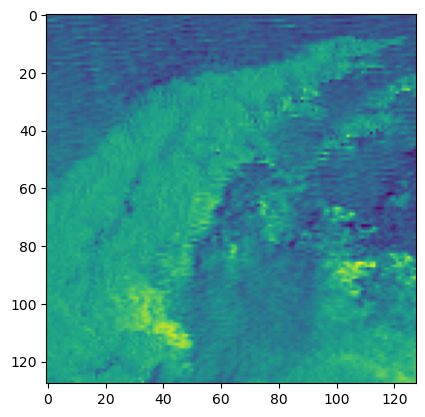

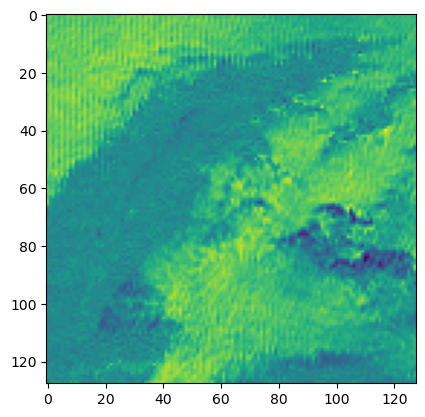

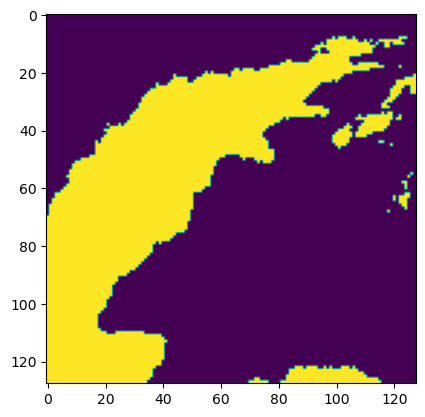

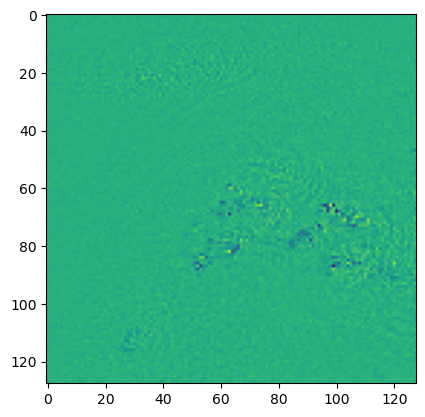

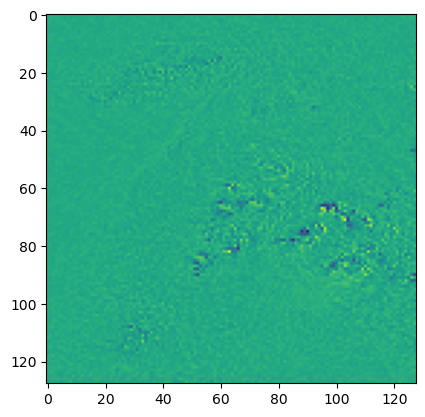

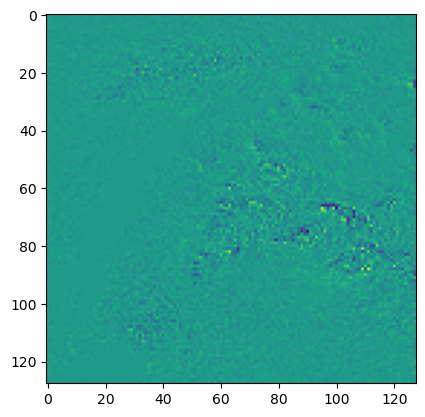

In [6]:
nb_time=5
for i in range(13):
    plt.imshow(images_i[nb_time, i, :,:])
    plt.show()

In [2]:
from DeepFate.config import PATH_TOOCAN_GLOBAL_FILE, INPUT_VARIABLES, PATH_RELATION_TABLE


In [3]:
relation_table = pd.read_csv(PATH_RELATION_TABLE)

In [4]:
path = PATH_TOOCAN_GLOBAL_FILE ###path change with new file
#list_object_mcs = toocan
list_object_mcs = load_TOOCAN_DYAMOND(path) ##change load_toocan
list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_object_mcs,
                   max_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][1],
                    min_area=DeepFate.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][1], #now in hours
                    duration_min = DeepFate.config.MCS_SPECS_RANGE['duration_hour'][0],
                    lat_max=DeepFate.config.MAX_LAT_TROPICS)

validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
label_all = np.array([list_valid_mcs_2[i].DCS_number for i in range(len(list_valid_mcs_2))])


print('min life cycle', np.min(np.array(list_end_times) - np.array(list_start_times)))

100%|██████████| 72965/72965 [00:04<00:00, 17702.16it/s]


min life cycle 9


In [5]:
from DeepFate.interpretable_features.features import get_all_features_single_mcs
import multiprocessing
import h5py

In [6]:
#PATH_PRECOMPUTED_DATASET_TRAIN_h5 = '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/TRAIN_DEEPDYAMOND_26-04-2024-21H08.h5'
#PATH_PRECOMPUTED_DATASET_VAL_h5 = '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/VAL_DEEPDYAMOND_26-04-2024-21H08.h5'
#PATH_PRECOMPUTED_DATASET_TEST_h5 = '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/TEST_DEEPDYAMOND_26-04-2024-21H08.h5'

In [7]:
PATH_PRECOMPUTED_DATASET_TRAIN_h5 = '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/DEEPDYAMOND_13-05-2024-13H58.h5'

In [8]:
def pipeline(index, filename = PATH_PRECOMPUTED_DATASET_TRAIN_h5):
    # Reopen the file in the worker process:

    with h5py.File(filename, 'r') as f:
        images_i = f['X'][index]
        specs_i = f['z'][index]
        
    
    df = get_all_features_single_mcs(X_images = images_i, 
                            specs = specs_i, 
                            list_valid_mcs_2 = list_valid_mcs_2, 
                            label_all = label_all, 
                            list_start_times = list_start_times)
    return df



In [9]:
with h5py.File(PATH_PRECOMPUTED_DATASET_TRAIN_h5, 'r') as f:
    print(len(f['X']))
    

51482


In [14]:
start=0
end=50
df_all=[]
for i in tqdm(range(start, end)):
    res = pipeline(i)
    df_all.append(res)

out = pd.concat(df_all, axis=0)
out.to_csv(f'/work/bb1153/b381993/precomputed_features/INTERPRETABLE_FEATURES_test.csv')

100%|██████████| 50/50 [00:09<00:00,  5.04it/s]


In [15]:
out

nb_neighbours_time_0  nb_neighbours_time_1  nb_neighbours_time_2  \
0                    15                    15                    15   
0                    13                    12                    11   
0                    16                    16                    16   
0                    15                    16                    17   
0                    17                    19                    17   
0                    14                    15                    16   
0                    17                    16                    16   
0                    17                    16                    17   
0                    10                     9                    10   
0                    22                    25                    26   
0                    18                    17                    15   
0                     9                     8                     9   
0                    20                    18                    19   
0                    29                    26                    24   
0                    18                    17                    16   
0                    12                    13                    12   
0                    18                    20                    21   
0                    14                    17                    17   
0                    12                    11                    12   
0                     7                     9                    10   
0                    16                    17                    21   
0                    27                    29                    29   
0                    20                    19                    17   
0                    30                    33                    32   
0                    24                    23                    23   
0                     9                     8                    11   
0                    15                    16                    16   
0                     8                     9                    10   
0                    18                    20                    18   
0                    21                    22                    21   
0                     4                     7                    10   
0                    15                    20                    19   
0                    13                    13                    14   
0                    22                    22                    20   
0                    11                    11                    11   
0                    10                     8                     8   
0                    23                    23                    26   
0                    26                    25                    24   
0                    14                    13                    14   
0                     8                     9                     8   
0                    17                    20                    21   
0                    12                    12                    15   
0                    10                    12                    14   
0                    33                    31                    31   
0                    26                    27                    27   
0                    22                    22                    22   
0                     6                     6                     6   
0                    17                    20                    22   
0                    10                    10                    11   
0                    15                    15                    14   

   nb_neighbours_time_3  nb_neighbours_time_4  nb_neighbours_time_5  \
0                    15                    16                    15   
0                    12                    13                    14   
0                    18                    17                    17   
0                    18                    19                    19   
0                    17   

In [30]:
with multiprocessing.Pool(100) as pool:
    res = list(tqdm(pool.imap(pipeline, np.array_split(range(25220),3000)), total = 3000))

out = pd.concat([df for df in res if df is not None], axis=0)
out.to_csv(f'/work/bb1153/b381993/interpretable_features_computed/TRAIN_INTERPRETABLE_FEATURES_26_04.csv')


  0%|          | 0/3000 [00:00<?, ?it/s]


TypeError: only size-1 arrays can be converted to Python scalars

In [14]:
out

NameError: name 'out' is not defined

In [18]:
99*int((26713/100))

26433

In [9]:
config.PATH_DYAMOND_ROOT_DIR+'DYAMOND_9216x4608x74_7.5s_4km_4608_0000357840'

'/fastdata/ka1081/DYAMOND/data/summer_data/SAM-4km/OUT_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000357840'

In [10]:
PATH_DEEPDYAMOND_PRECOMPUTED_DATASET = '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/'

In [11]:
path_output_h5 = os.path.join(PATH_DEEPDYAMOND_PRECOMPUTED_DATASET, 'DEEPDYAMOND_08-05-2024-20H45.h5')

In [12]:
path_output_h5

'/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/DEEPDYAMOND_08-05-2024-20H45.h5'

In [2]:
path_output_h5= '/work/bb1153/b381993/data/precomputed_datasets_dyamond_new_life_cycles_v3/DEEPDYAMOND_13-05-2024-13H58.h5'

In [9]:
import h5py

# Open the HDF5 file
with h5py.File(path_output_h5, 'r') as hdf_file:
    # Access the dataset
    dataset = hdf_file['X']
    
    # Now you can work with the dataset
    # For example, you can read data from it:
    data = dataset[-200:]

In [10]:
data.shape

(200, 10, 13, 128, 128)

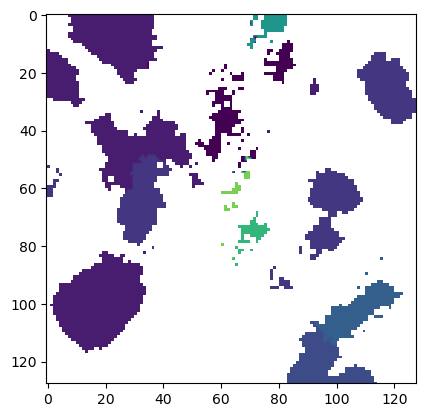

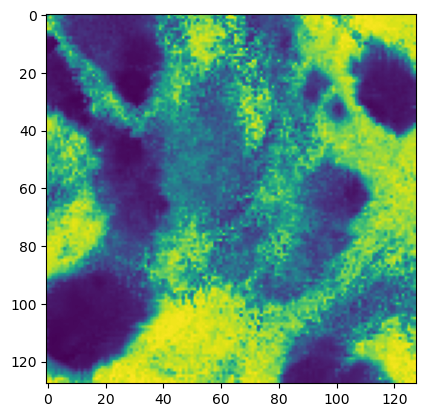

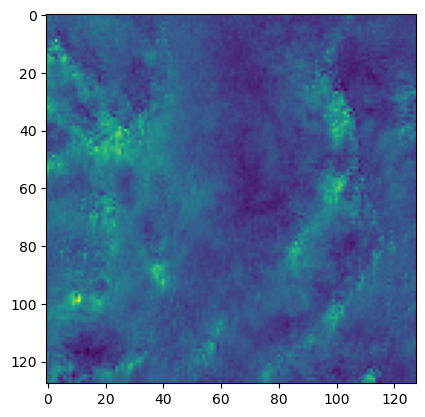

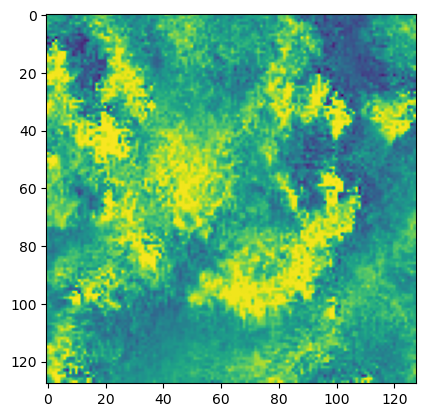

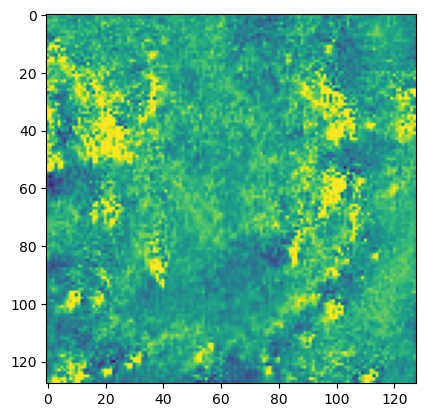

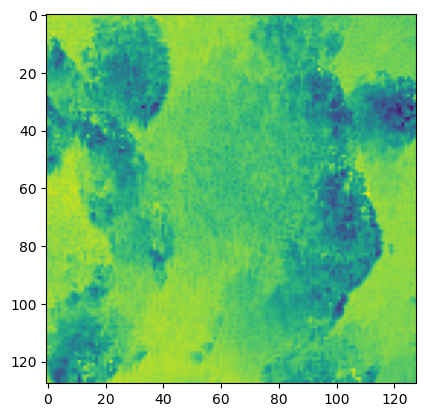

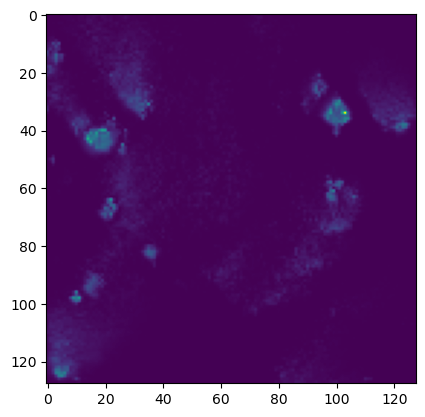

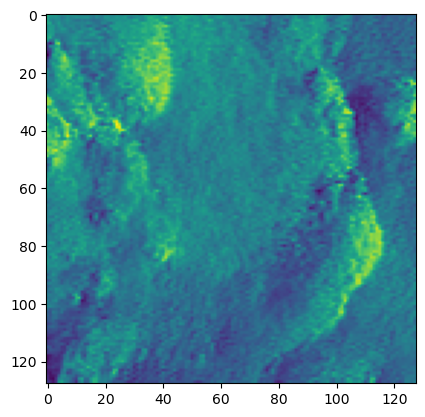

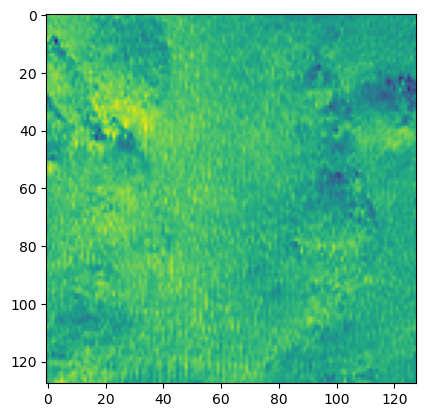

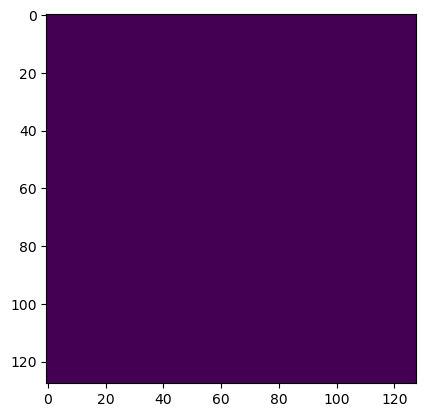

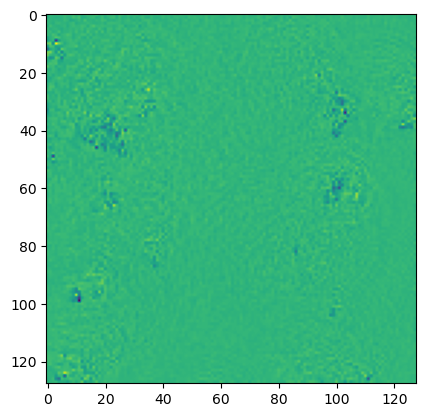

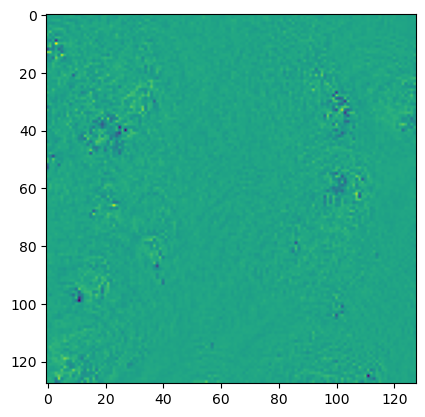

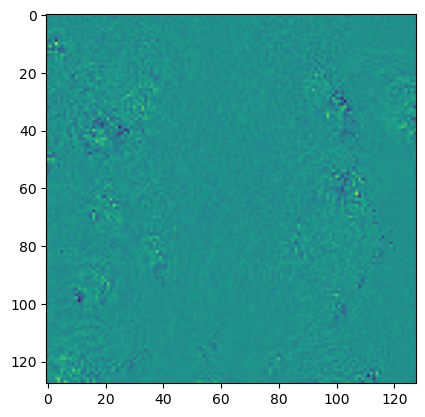

In [13]:
for i in range(13):
    plt.imshow(data[0,2,i,:,:])
    plt.show()

In [25]:
file_pb = '/work/bb1153/b381993/data3/data/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.08/GLOBAL/2016/2016_09_01/mcs_mask_TOOCAN_SAM_20160901-009.nc'


In [52]:
file_path = config.PATH_SEGMENTED_IMGS + relation_table['img_seg_path'].iloc[60]

In [53]:
xr.open_dataset(file_path)

<xarray.Dataset>
Dimensions:     (time: 1, latitude: 2072, longitude: 9216)
Coordinates:
  * latitude    (latitude) float32 -40.0 -39.96 -39.92 ... 39.92 39.96 40.0
  * longitude   (longitude) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * time        (time) datetime64[ns] 2016-08-14T17:00:00
Data variables:
    cloud_mask  (time, latitude, longitude) float32 ...
    mcs_mask    (time, latitude, longitude) float32 ...
Attributes:
    title:                      TOOCAN segmented images - Gridded data 0.04 d...
    conventions:                CF-1.6, ACDD-1.3
    institution:                CNRS/LEGOS/IPSL
    creator_name:               Thomas Fiolleau
    image_time:                 2016-08-14-T17-00-00 UTC
    slot_start_time:            17-00-00 UTC
    slot_end_time:              17-30-00 UTC
    model:                      SAM
    grid_resolution_in_degree:  0.04
    TOOCAN version:             2.08

In [49]:
file_path = os.path.join(DeepFate.config.PATH_DYAMOND_ROOT_DIR,'DYAMOND_9216x4608x74_7.5s_4km_4608_0000357840.PW.2D.nc')


In [51]:
xr.open_dataarray(file_path)

<xarray.DataArray 'PW' (time: 1, lat: 4608, lon: 9216)>
[42467328 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.98 -88.94 -88.9 -88.86 ... 88.86 88.9 88.94 88.98
  * lon      (lon) float32 0.01953 0.05859 0.09766 0.1367 ... 359.9 359.9 360.0
  * time     (time) float32 245.1
Attributes:
    long_name:  Precipitable Water
    units:      kg/m2

In [20]:
from DeepFate.datasets.utils import open_xarray_rolling_lon

In [23]:

file_path = os.path.join(DeepFate.config.PATH_DYAMOND_ROOT_DIR,'DYAMOND_9216x4608x74_7.5s_4km_4608_0000357840.PW.2D.nc')
lat_delta_pixels = DeepFate.config.SPACE_WINDOW['lat_delta_pixels']
lon_delta_pixels = DeepFate.config.SPACE_WINDOW['lon_delta_pixels']
lat_delta_degrees = DeepFate.config.SPACE_WINDOW['lat_delta_degrees']
lon_delta_degrees = DeepFate.config.SPACE_WINDOW['lon_delta_degrees']

lat, long = 35, 110

X = open_xarray_rolling_lon(file_path = file_path, 
            lat_bary = lat, 
            lon_bary = long, 
            lat_delta = lat_delta_degrees, 
            lon_delta = lon_delta_degrees, 
            output_shape = (lat_delta_pixels, lon_delta_pixels))

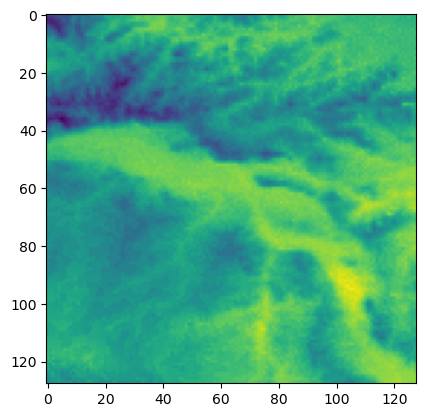

In [24]:
plt.imshow(X)

In [6]:
list_list_utime = [list_valid_mcs_2[i].clusters.LC_UTC_time for i in range(len(list_valid_mcs_2))]

In [8]:
flat_utime = [e for little_list in list_list_utime for e in little_list]

In [44]:
pb_uts = []
for utime in tqdm(flat_utime):
    try:
        relation_table[relation_table['UTC_sec']==utc_time]
    except:
        pb_uts.append(utime)

100%|██████████| 1200746/1200746 [00:03<00:00, 360614.83it/s]


In [45]:
pb_utc_unique = np.unique(pb_uts)

In [46]:
len(pb_utc_unique), len(relation_table)

(1043, 1918)

In [39]:
list_gaps=[]
for value in pb_utc_unique:
    print('min gaps', (relation_table['UTC_sec'] - value).abs().min())    
    list_gaps.append((relation_table['UTC_sec'] - value).abs().min())
    print('try', (relation_table['UTC_sec'] - value).abs().min()/(6))
    # Get the row with the nearest value
    nearest_index = (relation_table['UTC_sec'] - value).abs().idxmin()
    nearest_row = relation_table.loc[nearest_index]['str_code']
    print(nearest_row)

min gaps 936
try 156.0
2016-8-12-0-0
min gaps 2736
try 456.0
2016-8-12-0-0
min gaps 4536
try 756.0
2016-8-12-0-0
min gaps 6336
try 1056.0
2016-8-12-0-0
min gaps 8136
try 1356.0
2016-8-12-0-0
min gaps 9936
try 1656.0
2016-8-12-0-0
min gaps 11736
try 1956.0
2016-8-12-0-0
min gaps 13536
try 2256.0
2016-8-12-0-0
min gaps 15336
try 2556.0
2016-8-12-0-0
min gaps 17136
try 2856.0
2016-8-12-0-0
min gaps 18936
try 3156.0
2016-8-12-0-0
min gaps 20736
try 3456.0
2016-8-12-0-0
min gaps 22536
try 3756.0
2016-8-12-0-0
min gaps 24336
try 4056.0
2016-8-12-0-0
min gaps 26136
try 4356.0
2016-8-12-0-0
min gaps 27936
try 4656.0
2016-8-12-0-0
min gaps 29736
try 4956.0
2016-8-12-0-0
min gaps 31536
try 5256.0
2016-8-12-0-0
min gaps 33336
try 5556.0
2016-8-12-0-0
min gaps 35136
try 5856.0
2016-8-12-0-0
min gaps 36936
try 6156.0
2016-8-12-0-0
min gaps 38736
try 6456.0
2016-8-12-0-0
min gaps 40536
try 6756.0
2016-8-12-0-0
min gaps 42336
try 7056.0
2016-8-12-0-0
min gaps 39618
try 6603.0
2016-8-12-0-30
min gaps 

(array([101., 110., 110.,  88., 110., 110.,  88., 110., 110., 106.]),
 array([1.80000e+01, 4.24980e+03, 8.48160e+03, 1.27134e+04, 1.69452e+04,
        2.11770e+04, 2.54088e+04, 2.96406e+04, 3.38724e+04, 3.81042e+04,
        4.23360e+04]),
 <BarContainer object of 10 artists>)

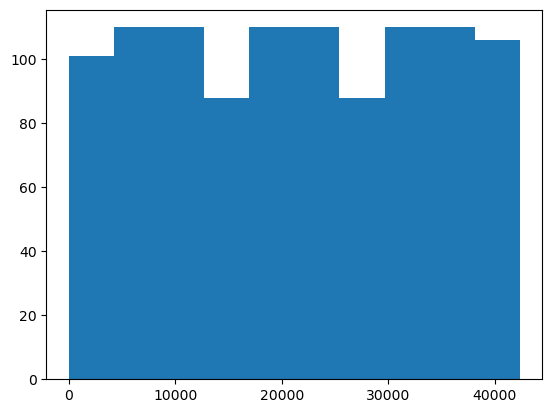

In [40]:
plt.hist(list_gaps)

In [3]:
## LOAD TOOCAN AND FIRST FILTER

In [4]:
DeepFate.config.PATH_TOOCAN_GLOBAL_FILE

'/work/bb1153/b381993/data3/data/new_TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [5]:
initial_list_mcs_object = load_TOOCAN_DYAMOND(DeepFate.config.PATH_TOOCAN_GLOBAL_FILE)

In [10]:
initial_list_mcs_object[10].

 ...]

In [9]:
initial_list_mcs_object[10]

In [44]:
initial_list_mcs_object = load_TOOCAN_DYAMOND(DeepFate.config.PATH_TOOCAN_GLOBAL_FILE)

initial_list_valid_mcs = get_list_valid_mcs(list_object_mcs = initial_list_mcs_object,
                   max_area=40000,
                    min_area=DeepDyamond.config.MCS_SPECS_RANGE['max_area'][0],
                    duration_max = 100,
                    duration_min = 3,
                    lat_max=DeepDyamond.config.MAX_LAT_TROPICS)

initial_nb_mcs = len(initial_list_valid_mcs)

/work/bb1153/b381993/data3/data/TOOCAN-GLOBAL-20160901-20160910.dat.gz


100%|██████████| 70927/70927 [00:01<00:00, 65123.79it/s]


In [45]:
# DURATION MAX AREA ABD LABEL BEFORE NEW FILTERING

In [46]:
initial_list_duration = np.array([ mcs_object.duration for mcs_object in initial_list_valid_mcs])
initial_list_area_all = np.array([np.max(mcs_object.clusters.surfkm2_172Wm2) for mcs_object in initial_list_valid_mcs])
initial_label_all = np.array([ mcs_object.label for mcs_object in initial_list_valid_mcs])

In [47]:
validity_list, start_list, end_list = get_validity_lifecycles_start_end(initial_list_valid_mcs)
new_list_valid_mcs = [initial_list_valid_mcs[i] for i in tqdm(range(initial_nb_mcs)) if validity_list[i] is True]
new_start_list = [start_list[i] for i in tqdm(range(len(start_list))) if validity_list[i] is True]
new_end_list = [end_list[i] for i in tqdm(range(len(end_list))) if validity_list[i] is True]


100%|██████████| 58901/58901 [00:00<00:00, 4007018.20it/s]


In [25]:
nb_batchs = 100

splitted_mcs_list = np.array_split(new_list_valid_mcs, nb_batchs)
splitted_start_list = np.array_split(new_start_list, nb_batchs)
splitted_end_list = np.array_split(new_end_list, nb_batchs)

splitted_idx = np.array_split(np.arange(len(new_list_valid_mcs)), nb_batchs)

(array([2.355e+03, 7.021e+03, 8.406e+03, 8.321e+03, 3.718e+03, 6.463e+03,
        5.049e+03, 3.758e+03, 1.478e+03, 2.300e+03, 1.482e+03, 1.074e+03,
        3.580e+02, 5.550e+02, 3.560e+02, 2.180e+02, 1.240e+02, 4.800e+01,
        8.700e+01, 4.600e+01, 3.000e+01, 1.100e+01, 1.200e+01, 6.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 5.        ,  6.76666667,  8.53333333, 10.3       , 12.06666667,
        13.83333333, 15.6       , 17.36666667, 19.13333333, 20.9       ,
        22.66666667, 24.43333333, 26.2       , 27.96666667, 29.73333333,
        31.5       , 33.26666667, 35.03333333, 36.8       , 38.56666667,
        40.33333333, 42.1       , 43.86666667, 45.63333333, 47.4       ,
        49.16666667, 50.93333333, 52.7       , 54.46666667, 56.23333333,
        58.        ]),
 <BarContainer object of 30 artists>)

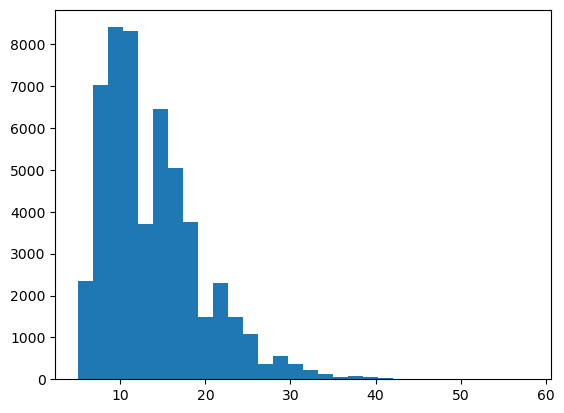

In [54]:
plt.hist(np.array(new_end_list) - np.array(new_start_list), bins=30)

In [26]:
len(splitted_mcs_list[0])

533

In [37]:
batch_list = []
for j, batch_mcs in enumerate(zip(*(splitted_mcs_list,splitted_start_list,splitted_end_list))):
    batch_list.append(batch_mcs)

In [38]:
len(batch_list)

100

In [41]:
len(batch_list[0])

3

In [28]:
batch_arr = np.array(batch_list[0])

In [36]:
batch_arr.T.shape

(533, 3)

In [32]:
batch_arr.reshape(533,3)

array([[<DeepDyamond.datasets.load_toocan_dyamond.MCS_IntParameters object at 0x7fffe437fd90>,
       ...,
       [10, 19, 13],
       [8, 30, 20],
       [16, 16, 17]], dtype=object)

In [15]:
len(batch_list[0])

3

In [49]:
len(new_list_valid_mcs), len(new_start_list),  len(new_end_list) 

(53286, 53286, 53286)

In [51]:
new_duration_list = [get_specs_mcs(object_mcs, start_time, end_time)['duration_mcs'] for (object_mcs, start_time, end_time) in zip(new_list_valid_mcs, new_start_list, new_end_list)]
new_extend_list = [get_specs_mcs(object_mcs, start_time, end_time)['extend_max_absolute'] for (object_mcs, start_time, end_time) in zip(new_list_valid_mcs, new_start_list, new_end_list)]
len(new_extend_list), len(new_duration_list)

(53286, 53286)

In [65]:
from scipy.stats import pearsonr
print(pearsonr(np.sqrt(initial_list_area_all), initial_list_duration))
print(pearsonr(new_extend_list, new_duration_list))

PearsonRResult(statistic=0.5418675608496989, pvalue=0.0)
PearsonRResult(statistic=0.6102947854382132, pvalue=0.0)


2


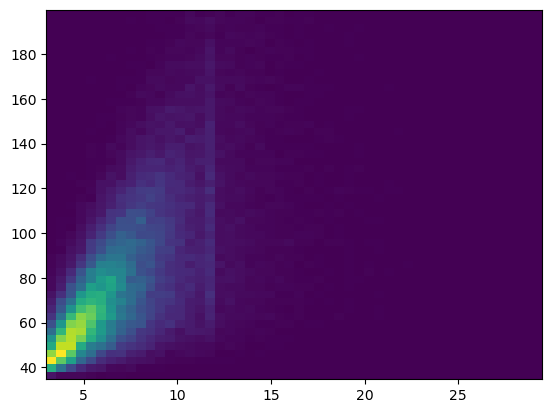

In [60]:
plt.hist2d(new_duration_list, new_extend_list,bins=50)
print(2)

(array([2.355e+03, 7.021e+03, 8.406e+03, 8.321e+03, 3.718e+03, 6.463e+03,
        5.049e+03, 3.758e+03, 1.478e+03, 2.300e+03, 1.482e+03, 1.074e+03,
        3.580e+02, 5.550e+02, 3.560e+02, 2.180e+02, 1.240e+02, 4.800e+01,
        8.700e+01, 4.600e+01, 3.000e+01, 1.100e+01, 1.200e+01, 6.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 3.        ,  3.88333333,  4.76666667,  5.65      ,  6.53333333,
         7.41666667,  8.3       ,  9.18333333, 10.06666667, 10.95      ,
        11.83333333, 12.71666667, 13.6       , 14.48333333, 15.36666667,
        16.25      , 17.13333333, 18.01666667, 18.9       , 19.78333333,
        20.66666667, 21.55      , 22.43333333, 23.31666667, 24.2       ,
        25.08333333, 25.96666667, 26.85      , 27.73333333, 28.61666667,
        29.5       ]),
 <BarContainer object of 30 artists>)

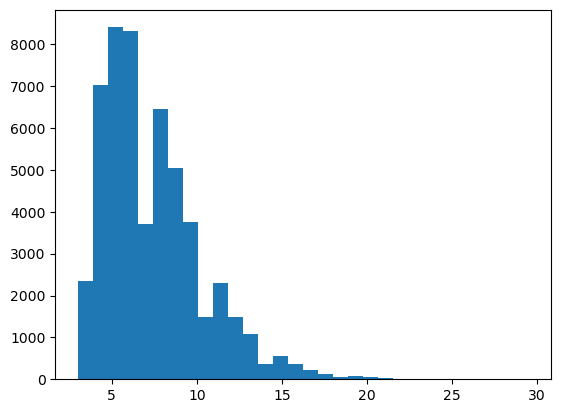

In [64]:
plt.hist(new_duration_list,bins=30)

In [53]:
new_idxes = [mcs.label for mcs in new_list_valid_mcs]
293247 in new_idxes

False

In [55]:
for ii in  [294447,313543,295099,295126,295158,295174,314800,295203,295208,295213,332452,295328,295336,295338]:
    print(ii in new_idxes)

False
False
False
False
False
False
False
False
False
False
False
False
False
False


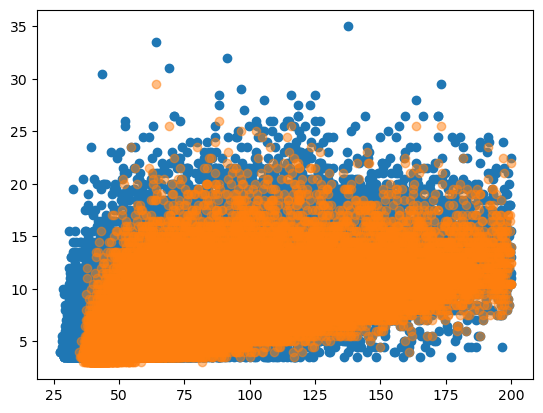

In [66]:
plt.scatter(np.sqrt(list_area_all), list_duration)
plt.scatter(new_extend_list, new_duration_list, alpha=0.5)

In [55]:
import h5py

In [56]:
path = '/work/bb1153/b381993/data/diamond_precomputed_new_life_cycles/DEEPDYAMOND_19-04-2023-21H11.h5'

In [147]:
with h5py.File(path, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    X = f['X'][-40:]

Keys: <KeysViewHDF5 ['X', 'y', 'z']>


In [148]:
np.unique(X[1][0].flatten())

array([-2.0094719e+01, -1.6443535e+01, -1.6002686e+01, ...,
        2.9563107e+02,  3.6818400e+05,            nan], dtype=float32)

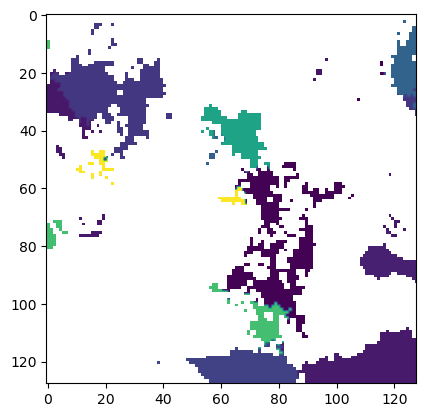

In [203]:
plt.imshow(X[4][2][0])

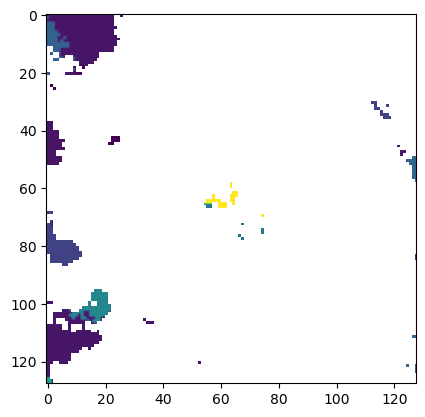

In [233]:
#plt.imshow(X[39][2][1])
plt.imshow(X[22][5][0])